In [15]:
library(ggplot2)
library(reshape2)
library(data.table)
library(dplyr)
# library(tidyverse)

In [3]:
island <- fread('/disk0/sm/methyl/03_pollution/total/data/DMRS_table.txt', sep='\t', header=T)#[,c('Name', 'Relation_to_Island')]

island$DMR <- paste0(island$DMRchr, '_', island$DMRstart, '_', island$DMRend)
tmp_dmr <- table(island$DMR)
dim(tmp_dmr)
dim(melt(tmp_dmr) %>% filter(value > 1))
dim(tmp_dmr)

island_only <- melt(table(island$Relation_to_Island))
island_only$Name <- c('CpG Island', 'CpG OpenSea', 'CpG Shelf', 'CpG Shore')
island_only$Name <- factor(island_only$Name , level=c('CpG Island', 'CpG Shore', 'CpG Shelf', 'CpG OpenSea'))
head(island_only)

[1] 588214

Warning message in melt.default(tmp_dmr):
“The melt generic in data.table has been passed a table and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(tmp_dmr). In the next version, this warning will become an error.”


[1] 73775     2

[1] 588214

Warning message in melt.default(table(island$Relation_to_Island)):
“The melt generic in data.table has been passed a table and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(table(island$Relation_to_Island)). In the next version, this warning will become an error.”


,Var1,value,Name
,<fct>,<int>,<fct>
1,Island,120808,CpG Island
2,OpenSea,474413,CpG OpenSea
3,Shelf,51214,CpG Shelf
4,Shore,124021,CpG Shore


In [4]:
p <- ggplot(island_only, aes(x=Name, y=value, fill=Name))+
  geom_bar(stat = "identity", size=.2, width=0.6) +
  coord_cartesian(ylim = c(0, max(island_only$value))) +
  scale_y_continuous(breaks = seq(0, max(island_only$value), 50000), labels = c('0', '50000', '100000', '150000', '200000', '250000', '300000', '350000', '400000', '450000')) +
  labs(x='CpG Annotations', y = 'number of DMR') +
  theme_bw() +
  theme(
    axis.text.x = element_text(size=12),
    axis.text.y = element_text(size=12),
    plot.title = element_text(hjust = 0.5,size=20,face='bold'),
    axis.title.x = element_text(size=15),
    axis.title.y = element_text(size=15),
    legend.text = element_text(size=12),
    
    panel.grid.major.x = element_line(linetype = "dotted", colour = "grey90"),
    panel.grid.major.y = element_line(linetype = "dotted", colour = "grey80"),
    panel.grid.minor.x = element_blank(), 
    panel.grid.minor.y = element_blank(),
    legend.title = element_blank(),
    legend.position = 'none'
        ) +
    scale_fill_manual(values=c('#fbc072', '#fbb472', '#79b3ff', '#3754f5'))
ggsave(p, file='/disk0/sm/methyl/03_pollution/total/plot/island.png', width=8000, height=6000, units='px', dpi=1000)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


In [25]:
heat <- island[, c('DMR', 'qval', 'beta', 'Name', 'Gencode', 'gene_type')] %>% filter(qval <= 0.00000001)
up <- heat[order(beta)][1:105, ]
down <- heat[order(-beta)][1:136, ]
nrow(melt(table(up$DMR)))
nrow(up)
nrow(melt(table(down$DMR)))
nrow(down)
heat <- rbind(up, down)
nrow(melt(table(heat$DMR)))
nrow(heat)

Warning message in melt.default(table(up$DMR)):
“The melt generic in data.table has been passed a table and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(table(up$DMR)). In the next version, this warning will become an error.”


[1] 100

[1] 105

Warning message in melt.default(table(down$DMR)):
“The melt generic in data.table has been passed a table and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(table(down$DMR)). In the next version, this warning will become an error.”


[1] 100

[1] 136

Warning message in melt.default(table(heat$DMR)):
“The melt generic in data.table has been passed a table and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(table(heat$DMR)). In the next version, this warning will become an error.”


[1] 200

[1] 241

In [31]:
tmp <- island %>% filter(qval <= 0.00000001)
up <- tmp[order(beta)][1:105, ]
down <- tmp[order(-beta)][1:136, ]
tmp <- rbind(up, down)
write.table(tmp, '/disk0/sm/methyl/03_pollution/total/data/DMRS_table_only200DMR.txt', sep='\t', quote=F, row.names=F)

In [ ]:
library(pheatmap) ## for heatmap generation
library(tidyverse) ## for data wrangling
library(ggplotify) ## to convert pheatmap to ggplot2
# library(heatmaply) ## for constructing interactive heatmap

In [40]:
beta <- fread('/disk0/sm/methyl/03_pollution/total/two-way_normalized_beta_value_all_CpGs.txt', sep='\t', header=T)
dfh <- data.frame(sample=as.character(colnames(beta)[2:length(beta)]),group="Treatment")%>%column_to_rownames("sample")
dfh$group <- sub(".*_", "", names(beta))[2:length(beta)]
length(dfh$group)

beta <-beta %>% filter(cpgs %in% heat$Name)
beta_data <- beta[, 2:length(beta)]
dim(beta_data)

[1] 2106

[1]  241 2106

pdf 
  2

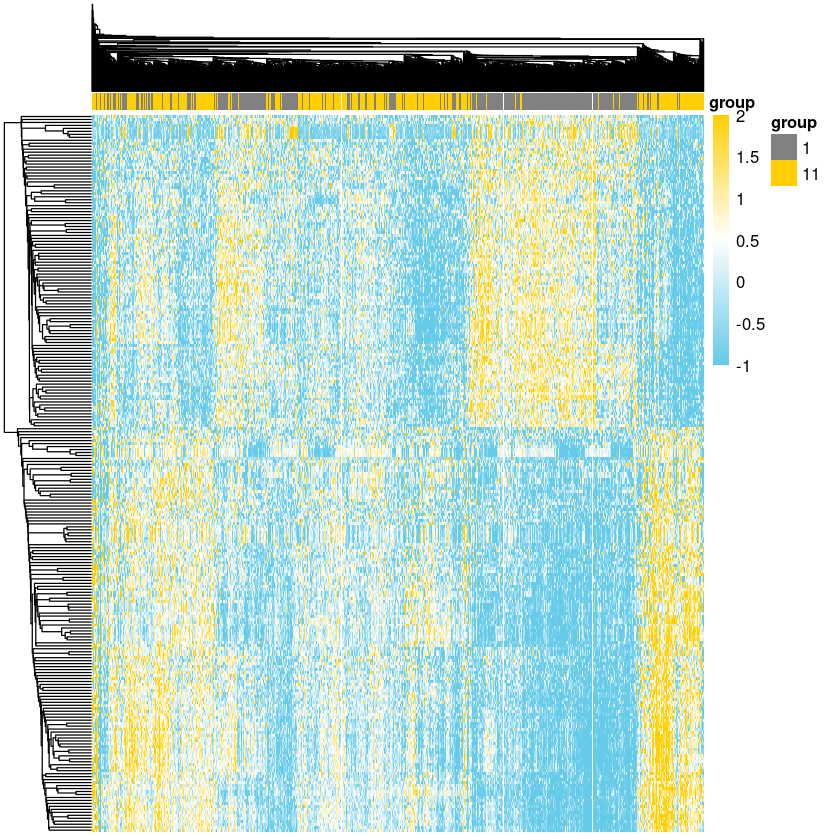

In [41]:
# png(filename="/disk2/kb/sm/methyl/meth/01/plot/1720_heat.png",width=2000,height=3000,unit="px", type = "cairo", bg = "transparent")
p <- pheatmap(
    beta_data,scale="row", 
    annotation_col = dfh,
    annotation_colors=list(group=c('1'="#818181", '11'="#ffcf01")),
    color=colorRampPalette(c("#66cae9", "#ffffff", "#ffcf01"))(100),
    breaks = seq(from=-1, to=2, length.out=100), 
    clustering_method = 'average',
    show_rownames = F,
    show_colnames = F, 
    # cluster_cols = F
    )


save_pheatmap_png <- function(x, filename, width=2000, height=2000, res = 300, units = "px") {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   png(filename, width=width, height=height, res = res, units = units)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

save_pheatmap_png(p,"/disk0/sm/methyl/03_pollution/total/plot/heatmap_DMR.png")

# dev.off()

In [42]:
tmp_gene <- melt(table(heat$Gencode)) %>% filter(Var1 != '-') 
dim(tmp_gene)
gene <- merge(tmp_gene, heat, by.x='Var1', by.y='Gencode', all.x=T) %>% filter(gene_type=='protein_coding') %>% select(c(Var1, value))
dim(gene)
head(gene)
gene_fi <- gene[!duplicated(gene), ]
dim(gene_fi)

Warning message in melt.default(table(heat$Gencode)):
“The melt generic in data.table has been passed a table and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(table(heat$Gencode)). In the next version, this warning will become an error.”


[1] 160   2

[1] 146   2

,Var1,value
,<fct>,<int>
1,ADARB1,1
2,ADGRD2,1
3,ADGRL4,2
4,ADGRL4,2
5,AEBP2,1
6,AHI1,1


[1] 115   2

In [21]:
p <- ggplot(gene_fi, aes(x=reorder(Var1, -value), y=value))+
  geom_bar(stat = "identity", size=.2, width=0.6, fill='#FB8072') +
  scale_y_continuous(breaks = seq(0, max(gene_fi$value), 1)) +
  labs(x='gene', y = 'number of cpg') +
  theme_bw() +
  theme(
    axis.text.x = element_text(size=8, angle=90, hjust=1),
    axis.text.y = element_text(size=15),
    plot.title = element_text(hjust = 0.5,size=20,face='bold'),
    axis.title.x = element_text(size=18),
    axis.title.y = element_text(size=18),
    legend.text = element_text(size=18),
    
    panel.grid.major.x = element_blank(), 
    panel.grid.major.y = element_line(linetype = "dotted", colour = "grey70"),
    panel.grid.minor.x = element_blank(), 
    panel.grid.minor.y = element_line(linetype = "dotted", colour = "grey70"),
    legend.title = element_blank(),
    legend.position = 'none'
    ) +
    scale_fill_manual(values=c('#FB8072'))
ggsave(p, file='/disk0/sm/methyl/03_pollution/total/plot/gene.png', width=12000, height=6000, units='px', dpi=1000)

In [43]:
target_cpg <- c('cg18473521_TC21', 'cg05404236_TC11', 'cg00481951_TC21', 'cg25478614_TC21')
target <- t(beta %>% filter(cpgs %in% target_cpg))
df <- data.frame(target)
names(df) <- df[1, ]
df <- df[2:nrow(df),]
df$group <- paste0('G', sub(".*_", "", rownames(df)))

In [44]:
for (tc in target_cpg) {
  tmp <- df[, c(tc, 'group')]
  names(tmp) <- c('beta', 'group')
  tmp$beta <- as.numeric(tmp$beta)
  head(tmp)
  p <- ggplot(tmp, aes(x=group, y=beta, group=group, fill=group))+
    geom_boxplot() +
    labs(title=tc, y = 'beta value') +
    theme_bw() +
    theme(
      axis.text.x = element_text(size=15),
      axis.text.y = element_text(size=15),
      plot.title = element_text(hjust = 0.5,size=20,face='bold'),
      axis.title.x = element_blank(), 
      axis.title.y = element_text(size=18),
      legend.text = element_text(size=18),
      
      panel.grid.major.x = element_blank(), 
      panel.grid.major.y = element_line(linetype = "dotted", colour = "grey70"),
      panel.grid.minor.x = element_blank(), 
      panel.grid.minor.y = element_line(linetype = "dotted", colour = "grey70"),
      legend.title = element_blank(),
      legend.position = 'none'
      ) +
      scale_fill_manual(values=c('#3366FF', '#FFDB14'))
  ggsave(p, file=paste0('/disk0/sm/methyl/03_pollution/total/plot/', tc,'.png'), width=6000, height=6000, units='px', dpi=1000)
}